In [1]:
from google.colab import files
uploaded = files.upload()

Saving hour.csv to hour.csv


The problem is that, as the new CEO of a bikesharing company in Washington, DC, you need to figure out which goal to focus on first. These goals could include things like improving customer satisfaction, increasing revenue, reducing costs, or growing the company's market share.

But before you can choose a goal, you need to understand how the company is doing right now. For example, if you want to improve customer satisfaction, you first need to know if customers are satisfied or not and what issues they might have.

To do this, you need to look at the company’s data (like how many bikes are rented, customer feedback, revenue, etc.). Only by understanding this data can you decide which goal to focus on and how to improve the company.

In [5]:
import pandas as pd
hour=pd.read_csv('hour.csv')
print(hour.head())
print(hour['count'].mean())
print(hour['count'].median())
print(hour['count'].std())
print(hour['registered'].min())
print(hour['registered'].max())
print(hour.describe())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  
189.46308763450142
142.0
181.38759909186527
0
886
          instant        season      

In this section, we explored how to calculate and interpret summary statistics for a dataset using Python and the pandas library. We learned how to calculate the mean, median, standard deviation, minimum, and maximum for specific columns in the dataset. These summary statistics give us valuable insights into the data, such as the average number of bike rentals and the variation in rentals between hours. We also used the describe() method to quickly generate a table of key statistics for all columns, which included the mean, percentiles, and range of values. By reviewing these statistics, we can identify trends, spot potential issues with the data, and make informed decisions to improve the business, such as adjusting pricing to increase ridership during off-peak hours. Overall, these calculations help us better understand the business’s performance and find opportunities for growth.

In [7]:
print(hour.loc[3,'count'])
print(hour.loc[2:4,'registered'])
print(hour.loc[hour['hr']<5,'registered'].mean())
print(hour.loc[(hour['hr']<5) & (hour['temp']<.50),'count'].mean())
print(hour.loc[(hour['hr']<5) & (hour['temp']>.50),'count'].mean())
print(hour.loc[(hour['temp']>0.5) | (hour['hum']>0.5),'count'].mean())
print(hour.groupby(['season'])['count'].mean())
print(hour.groupby(['season','holiday'])['count'].mean())

13
2    27
3    10
4     1
Name: registered, dtype: int64
20.7881427367238
19.521104742053154
33.639322916666664
193.36764103264582
season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64
season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64


In this section, we learned how to analyze subsets of data using the loc() and groupby() methods. We started by using loc() to select specific rows and columns based on logical conditions, such as examining nighttime ridership (midnight to 4 AM) or comparing ridership on cold versus warm early mornings. We also applied logical operators like & (AND) and | (OR) to refine our analysis and focus on particular subsets, such as ridership under specific temperature or humidity conditions.

Next, we used the groupby() method to group the data by season and calculate the average ridership for each season. The results revealed a clear seasonal pattern, with higher ridership in spring and summer and lower ridership in fall and winter. We also grouped the data by both season and holiday to compare ridership on holidays versus non-holidays. This showed that holidays during colder seasons tend to have lower ridership, while holidays in warmer seasons have similar ridership to non-holidays. By analyzing these subsets and exploring different perspectives of the data, we can generate valuable insights to inform business decisions, such as offering discounts or specials during certain seasons or times of the day

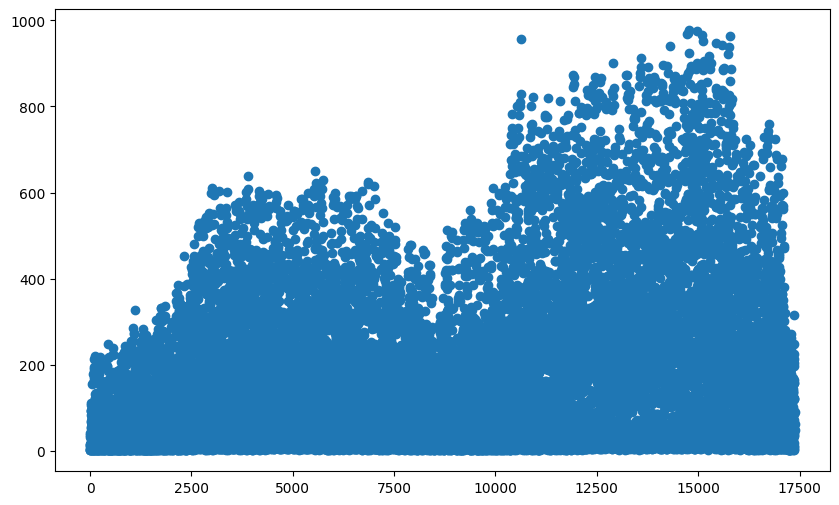

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.show()

The scatterplot provides a clear visual of our data, with time (instant) on the x-axis and bike rental counts (count) on the y-axis. It shows the progression of hourly data from the start of 2011 to the end of 2012. Key observations include seasonal variations in ridership, with higher counts during warmer months and lower counts in colder months. Additionally, there is a noticeable increase in ridership over time. The scatterplot is useful for identifying relationships, spotting trends, and detecting outliers, offering valuable insights into the data’s patterns.

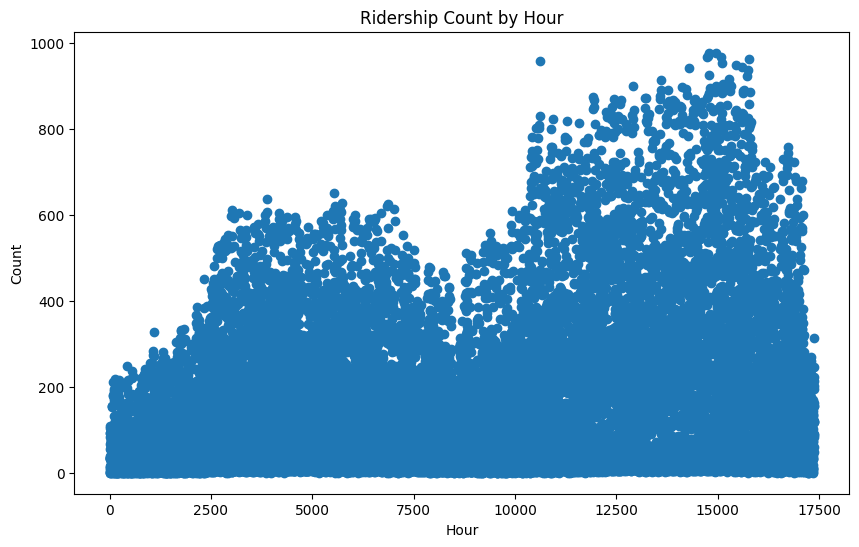

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")
plt.show()

#just adding label to our graoh,naming y-axis=count and x-axis= ridership count by hour


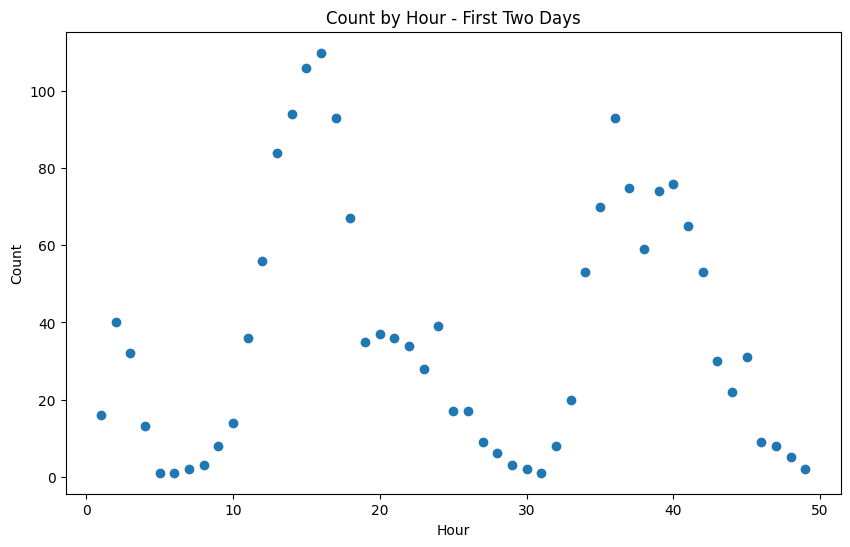

In [10]:
hour_first48=hour.loc[0:48,:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

To plot a subset of the data, we selected the first two full days by defining hour_first48 as the subset containing rows 0 through 48. We then created a scatter plot for this subset, using hour_first48['instant'] for the x-axis (hour) and hour_first48['count'] for the y-axis (rental count). By limiting the data to just two days, we made the plot clearer and avoided overlapping points, making it easier to spot individual patterns. This method allows us to explore smaller-scale patterns within days while still being able to observe broader trends in the overall dataset.

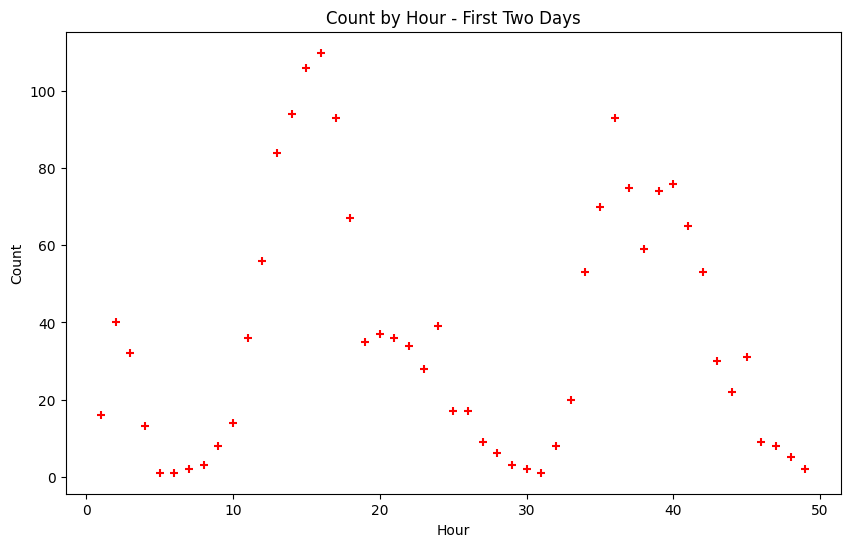

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'],c='red',marker='+')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

We can customize the appearance of our plots by adjusting parameters in the scatter() function. For example, in the following code, we set the color of the points to red using the c='red' argument, and change the marker style to a plus sign using marker='+'. This allows us to create a plot with red plus-shaped points instead of the default dots

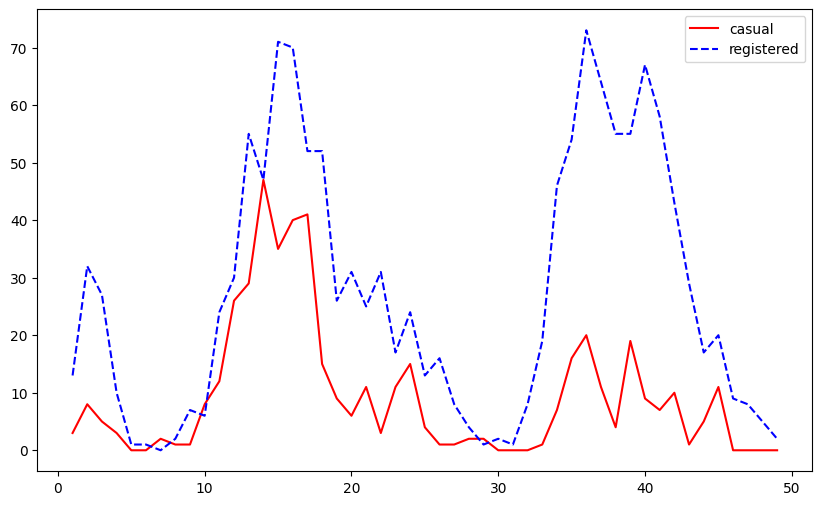

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hour_first48['instant'], hour_first48['casual'],c='red',label='casual',linestyle='-')
ax.plot(hour_first48['instant'],\
hour_first48['registered'],c='blue',label='registered',linestyle='--')
ax.legend()
plt.show()

instead of scatter we use plot because that gives us a line plot, just representing our data in different plot forms.
This plot shows that the number of casual riders is almost always lower
than the number of registered riders. The plot’s legend indicates different
colors for casual and registered users as well as the different line styles (solid for casual riders, dashed for registered riders)

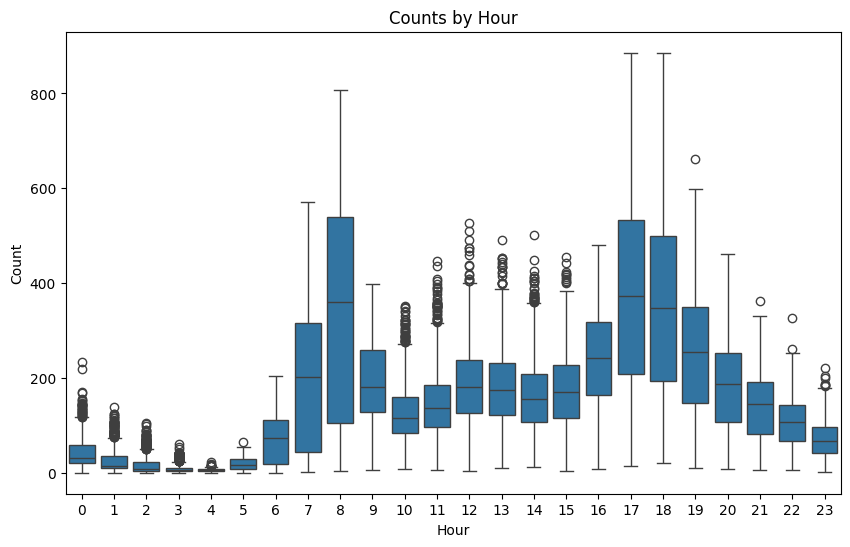

In [13]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='hr', y='registered', data=hour)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")
plt.show()

In this step, we use the seaborn package, which is built on top of Matplotlib and offers more features for creating informative and aesthetically pleasing plots. Specifically, we use the boxplot() method to generate a box plot, which provides a visual summary of the distribution of data.

The box plot shows the distribution of ridership data for each hour of the day. Each vertical box plot represents one hour, with the upper and lower horizontal boundaries of each box representing the 75th and 25th percentiles of the data, respectively. The line inside the box indicates the median (50th percentile), and the lines extending from the box represent the range of non-outlier data. Points outside these lines are considered outliers.

By looking at these box plots, we can compare ridership across different hours. For example, we can see that ridership tends to be lower in the early morning hours (around 5 AM) but increases around 6 AM and peaks around 5 PM and 6 PM, which could indicate a pattern related to commuting times. This type of visualization helps identify trends and variations in ridership during different parts of the day.






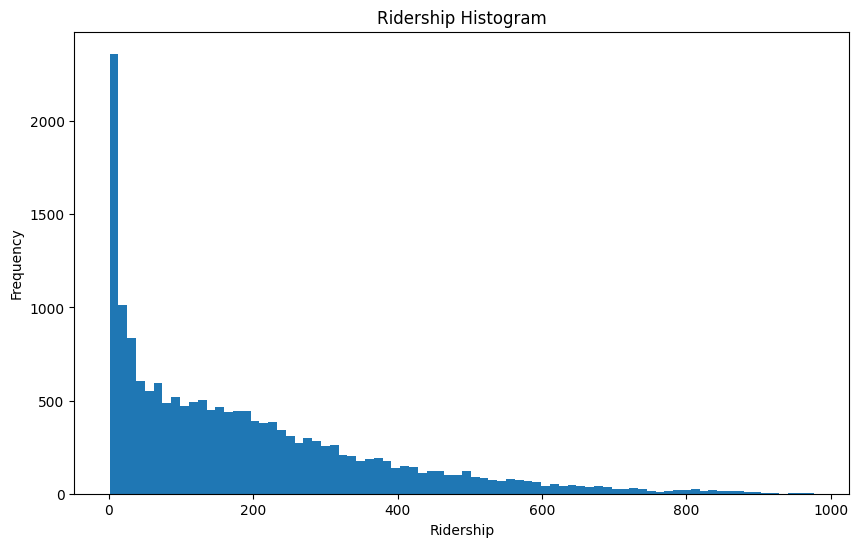

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(hour['count'],bins=80)
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")
plt.show()

In a histogram, each bar represents the frequency of a particular range of values—in this case, ridership counts. The height of each bar shows how many hours in the dataset had a specific number of riders. For example, around the value of 800 on the x-axis, the bars are quite low, indicating that very few hours had 800 riders. However, near 200 riders, the bars are much higher, suggesting that for almost 500 individual hours, the ridership was around 200.

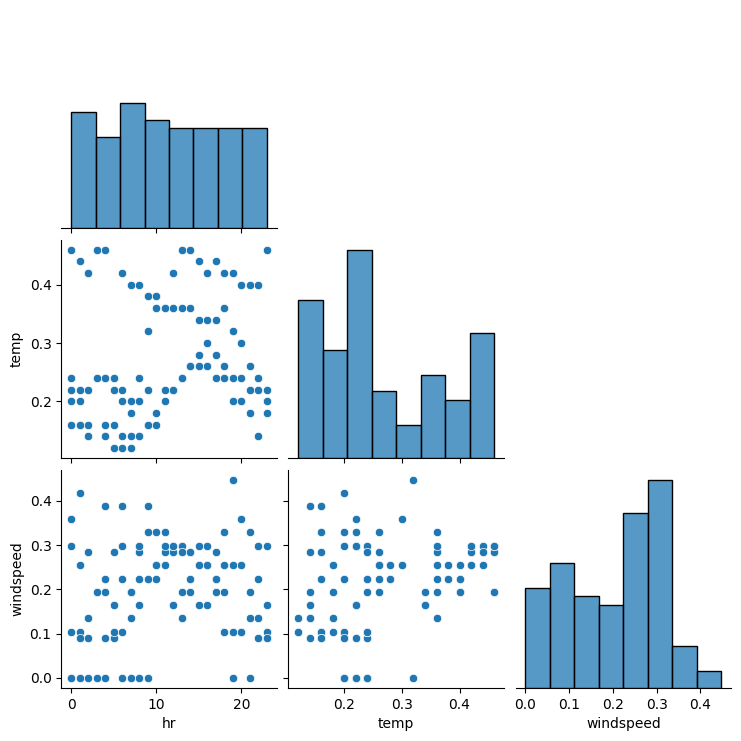

In [15]:
thevariables=['hr','temp','windspeed']
hour_first100=hour.loc[0:100,thevariables]
sns.pairplot(hour_first100, corner=True)
plt.show()

In this part of the analysis, we create a variable called thevariables, which contains a list of three variables that we want to plot. We also create hour_first100, a subset of the data containing only the rows with index 100 or less from the hour dataset. Using the pairplot() function from the seaborn package, we generate a pair plot that includes scatterplots for every possible combination of the selected variables, as well as histograms for each individual variable.

The pair plot provides a comprehensive view of the relationships between the selected variables. However, in this case, the scatterplots appear to show no clear relationship between the variables, indicating that the relationships may be random. If we had additional variables, such as snowfall data, we might see more obvious correlations, such as a decrease in snowfall as temperature increases. Identifying such relationships is a key part of exploratory data analysis and will be explored further in the next section.

In [16]:
#correlation calculation
print(hour['casual'].corr(hour['registered']))
print(hour['temp'].corr(hour['hum']))

0.5066177004294634
-0.06988139105119354


In [17]:
thenames=['hr','temp','windspeed']
cor_matrix = hour[thenames].corr()
print(cor_matrix)

                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


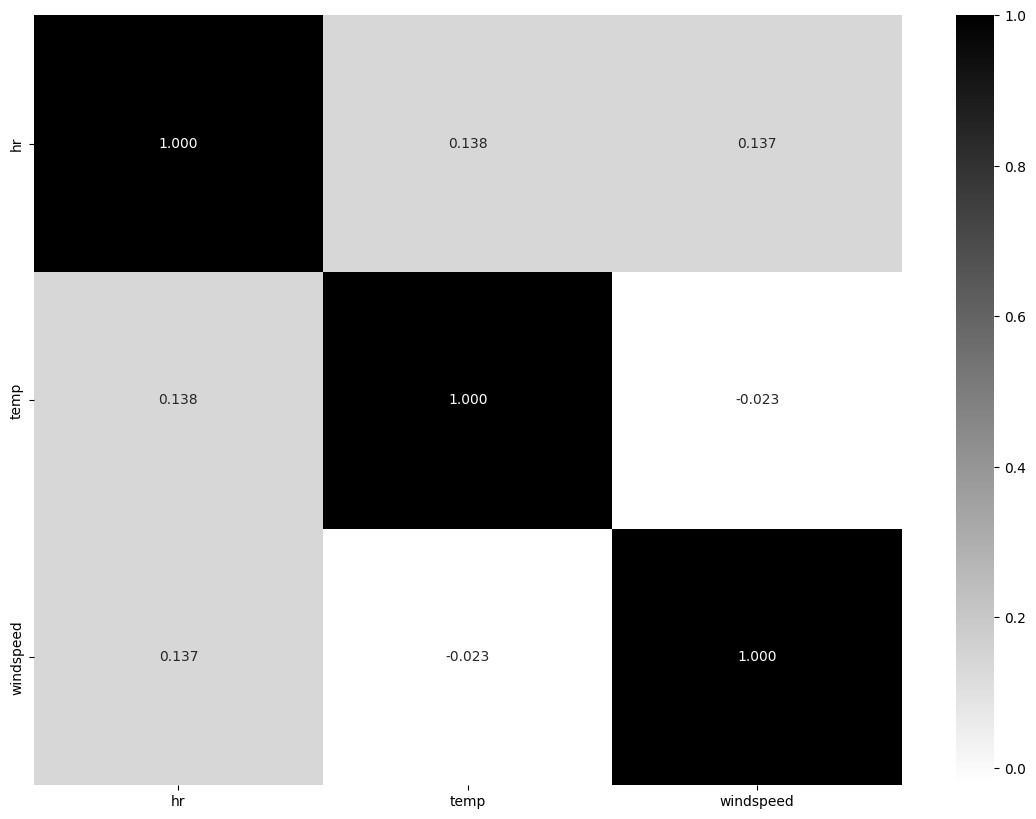

In [18]:
#creating heat maps
plt.figure(figsize=(14,10))
corr = hour[thenames].corr()
sns.heatmap(corr, annot=True,cmap='binary',
 fmt=".3f",
 xticklabels=thenames,
 yticklabels=thenames)
plt.show()

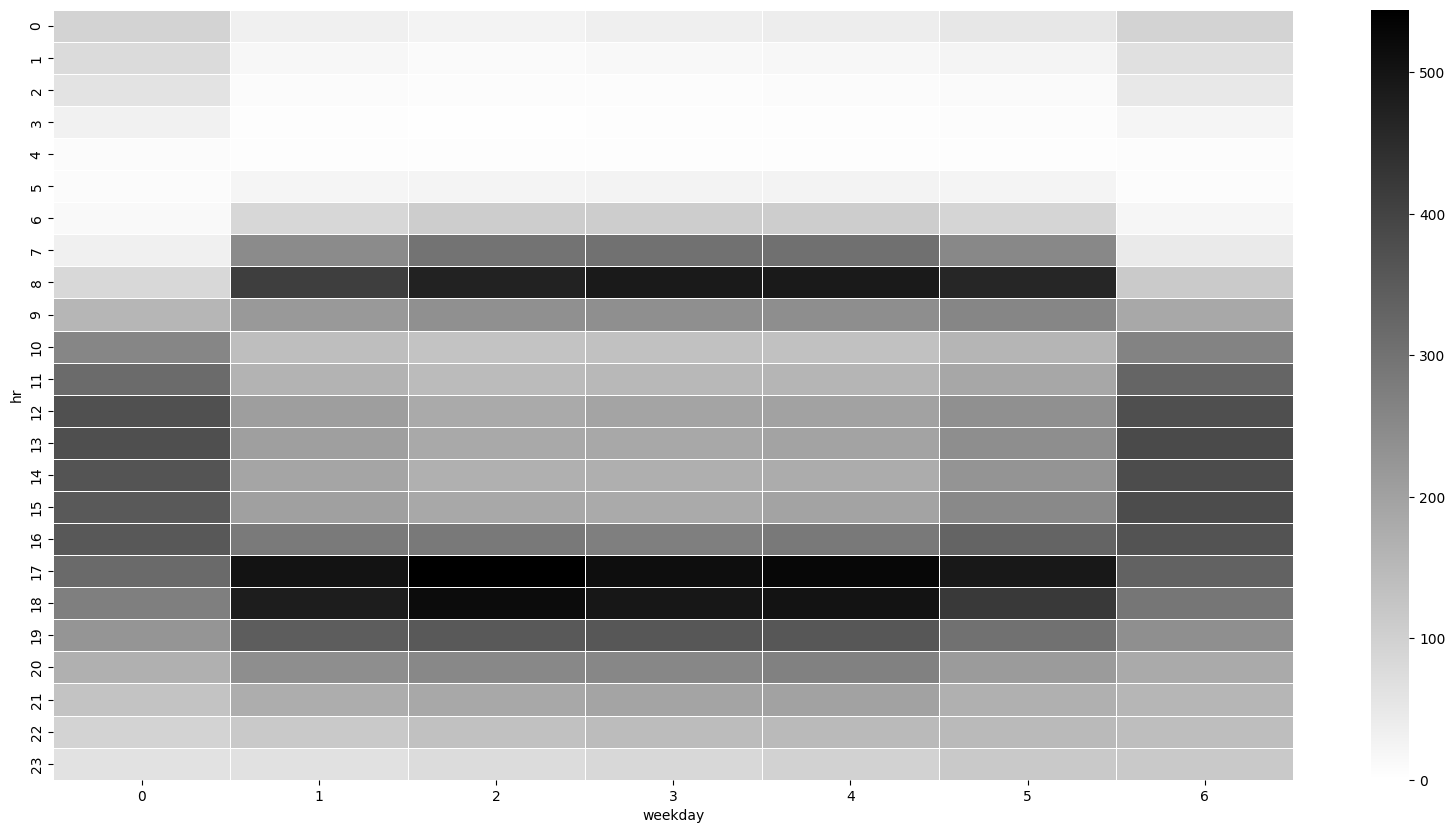

In [19]:
# Create a pivot table
df_hm =hour.pivot_table(index = 'hr',columns ='weekday',values ='count')
# Draw a heatmap
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_hm, fmt="d", cmap='binary',linewidths=.5, vmin = 0)
plt.show()

The heat map visualizes the average ridership for each hour of the day across different days of the week. Darker colors indicate higher ridership, while lighter colors show lower ridership. It highlights peak commuting times around 8 AM and 5 PM, as well as weekend activity, especially on Saturday and Sunday afternoons. This can help businesses identify busy times for potential surge pricing or off-peak discounts to optimize operations and revenue.






From calculating correlations to making data-driven decisions, the chapter emphasizes the importance of understanding relationships between variables to improve business operations. Correlations, measured by the Pearson coefficient, help identify patterns like positive or negative relationships between variables, although it's crucial to remember that correlation does not imply causation. Through correlation matrices and heatmaps, you can quickly spot relationships between multiple variables, guiding decisions such as adjusting pricing strategies or optimizing bike availability. Additionally, data analysis can help uncover customer behaviors, maintenance needs, and operational inefficiencies, ultimately leading to more informed decisions. By combining data insights with business acumen, CEOs can identify trends, anticipate demand, and implement strategies like surge pricing or targeted promotions to drive revenue growth. Mastering these skills enables CEOs to make quicker, more effective decisions, ensuring the business adapts and thrives in a dynamic environment.